In [1]:
import sys
sys.path.append("/Users/hhg/Research/kinematic_lensing/repo/KLens/")
import tfCube as tfCube

sys.path.append("/Users/hhg/Research/kinematic_lensing/repo/kl_measurement/scripts/")
from parameter_class import fit_parameters
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import emcee
import chisq
from generate_TFcube import get_TFcube_pars, get_data_TFcube

%config InlineBackend.figure_format = 'retina'

dir_tfCube: /Users/hhg/Research/kinematic_lensing/repo/KLens


In [2]:
sys.path.append("/Users/hhg/Research/kinematic_lensing/code/BinnedFit/")
from binnedFit_utilities import *

In [3]:
update_TF, _ = get_TFcube_pars()

update_TF['g1'] = 0.05
update_TF['sini'] = 0.5
update_TF['vcirc'] = 200. 

update_TF['n_knots'] = 25.
update_TF['knot_fraction'] = 0.0
update_TF['throughput'] = 0.29
update_TF['slitWidth'] = 1.0
update_TF['psfFWHM'] = 0.5
update_TF['pixScale'] = 0.1185  # 0.032 

update_TF['redshift'] = 0.4
update_TF['Resolution'] = 6000.
update_TF['nm_per_pixel'] = 0.033 # 0.025
update_TF['expTime'] = 3600.0 
update_TF['linelist']['flux'][update_TF['linelist']['species'] == 'Halpha'] = 6.0e-24
update_TF['lambda_min'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'Halpha'] - 2
update_TF['lambda_max'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'Halpha'] + 2
update_TF['norm'] = 0.
update_TF['ngrid'] = 256
update_TF['image_size'] = 128

TF_pars, meta_parameters = get_TFcube_pars(update_TF)

#%time data, noise, obslambda = get_data_TFcube(TF_pars, meta_parameters, return_lambda=True)

data = load_pickle("/Users/hhg/Research/kinematic_lensing/data/data.pickle")
noise = load_pickle("/Users/hhg/Research/kinematic_lensing/data/noise.pickle")
obslambda = np.load("/Users/hhg/Research/kinematic_lensing/data/obslambda.npy")

In [4]:
TF_pars

{'g1': 0.05,
 'g2': 0.0,
 'sini': 0.5,
 'diskFrac': 1.0,
 'n_knots': 25.0,
 'knot_fraction': 0.0,
 'aspect': 0.2,
 'vcirc': 200.0,
 'sigma_intr': 0.01,
 'redshift': 0.4,
 'half_light_radius': 0.5,
 'vscale': 0.5,
 'r_0': 0.0,
 'V_0': 0.0,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 2.e-25),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 0.0,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psfFWHM': 0.5,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.1185,
 'Resolution': 6000.0,
 'lambda_min': array([917.0454]),
 'lambda_max': array([921.0454]),
 'nm_per_pixel': 0.033,
 'gain': 1.0,
 'read_noise': 3.0,
 'throughput': 0.29,
 'expTime': 3600.0,
 'type_of_observation': 'slit',
 'fiber_size': 1.0,
 'fiber_offsets': [[0.0, 0.0],
  [1.0, 0.0],
  [-1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0]],
 'slitAngles':

In [5]:
# save data, noise for future call
save_pickle(filename="/Users/hhg/Research/kinematic_lensing/data/TF_pars.pickle", info=TF_pars)
save_pickle(filename="/Users/hhg/Research/kinematic_lensing/data/meta_parameters.pickle", info=meta_parameters)
save_pickle(filename="/Users/hhg/Research/kinematic_lensing/data/data.pickle", info=data)
save_pickle(filename="/Users/hhg/Research/kinematic_lensing/data/noise.pickle", info=noise)
np.save("/Users/hhg/Research/kinematic_lensing/data/obslambda.npy",obslambda)

#data2=load_pickle("/Users/hhg/Research/kinematic_lensing/data/data.pickle")
#noise2=load_pickle("/Users/hhg/Research/kinematic_lensing/data/noise.pickle")
#obslambda2=np.load("/Users/hhg/Research/kinematic_lensing/data/obslambda.npy")

In [6]:
chisq_parameters = chisq.get_default_parameters(pars=TF_pars)
chisq_parameters['slitAngles'] = 0.
chisq_parameters['sigma_TF_intr'] = 20.
chisq_parameters

{'central_wavelength': 656.461,
 'redshift': 0.4,
 'V_0': 0.0,
 'r_0': 0.0,
 'vcirc': 200.0,
 'vscale': 0.5,
 'sini': 0.5,
 'slitAngles': 0.0,
 'sigma_intr': 0.01,
 'sigma_v': 4.566797692475257,
 'half_light_radius': 0.5,
 'r_e': 0.29797377830750893,
 'aspect': 0.2,
 'q': 0.8717797887081347,
 'e_obs': 1.0,
 'I0': 15000.0,
 'frac_cont': 0.0,
 'Resolution': 6000.0,
 'bkg_level': 15,
 'psfFWHM': 0.5,
 'knot_fraction': 0.0,
 'n_knots': 25.0,
 'g1': 0.05,
 'g2': 0.0,
 'd': 0.0,
 'sigma_TF_intr': 20.0,
 'slitWidth': 1.0,
 'PA': 0.0,
 'slitW_corr': 0.0,
 'diskFrac': 1.0,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 2.e-25),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 0.0,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.1185,
 'lambda_min': array([917.0454

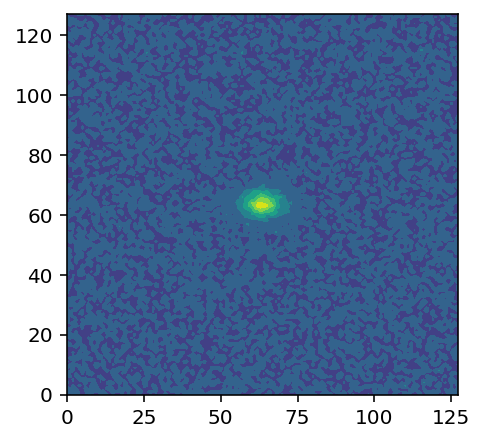

In [7]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 3.5))
ax.contourf(data['image'])

In [8]:
data['image']

array([[ 2.0010586e-04, -6.8087061e-04,  2.6677965e-04, ...,
         8.5482775e-04,  4.0553356e-04,  5.8002654e-04],
       [ 3.0855466e-05,  4.0309250e-04,  3.7440207e-04, ...,
         1.0423157e-04,  4.7248427e-04,  4.2893615e-04],
       [ 2.0637602e-04,  8.8060378e-06,  1.4298696e-04, ...,
         3.8604182e-04, -4.7906168e-04,  4.7448493e-04],
       ...,
       [-3.2399228e-04,  2.7243717e-04,  4.9736560e-04, ...,
         9.9437399e-05,  7.0090196e-04,  1.2718436e-03],
       [ 8.2500151e-04, -2.3870640e-05, -1.9272193e-04, ...,
         8.9586596e-05, -5.1729486e-04,  1.7507558e-04],
       [-4.3100919e-04, -5.2194262e-04, -1.5688974e-04, ...,
        -5.5963645e-04, -4.4293498e-05, -4.0099924e-04]], dtype=float32)

# Image Fit

In [9]:
def log_prior(x, names):
    '''
    Takes parameter values x and 
    '''
    count = 0
    for i, name in zip(x, names):
        limits = fit_pars.par_limits[name]
        low, high = limits[0], limits[1]
        if i< low or i>high:
            count+=1
    if count!=0:
        return np.inf
    else : return 0

def log_prob_image(values, names):
    '''
    returns chi-squared
    values : data vector array
    names : list of fit parameters
    '''
    log_p = log_prior(values, names)

    if not np.isfinite(log_p):
        return -np.inf
    else:
        return  - 0.5*chisq.chisq(values, names, data, meta_parameters=meta_parameters, parameters=chisq_parameters, noise=noise, fit_image=True)

par_names = ['half_light_radius', 'e_obs']

#Define parameters

# Create fit parameter object
fit_pars = fit_parameters(par_names)
starting_point = np.array(list(fit_pars.dict.values()))
std = starting_point*0.4

par_names = list(fit_pars.dict.keys())

true_pars = dict((i, TF_pars.get(i, '')) for i in par_names)

ndim = len(par_names)
nwalkers = 50

p0 = emcee.utils.sample_ball(starting_point, std, size=nwalkers)

In [10]:
pars = chisq.get_default_parameters()
model = chisq.evaluate_model(pars, meta_parameters, fit_image=True, fit_spectra=False)

In [11]:
print('Knot fraction: ', TF_pars['knot_fraction'])

for f, t in zip(starting_point, true_pars.items()):
    print('{}, initial: {}'.format(t, f))

Knot fraction:  0.0
('half_light_radius', 0.5), initial: 1.0
('e_obs', ''), initial: 0.5


In [12]:
fit_pars.par_limits['half_light_radius'] = [0.01, 10.]
fit_pars.par_limits['e_obs'] = [0., 1.]
fit_pars.par_limits

{'half_light_radius': [0.01, 10.0], 'e_obs': [0.0, 1.0], 'frac_cont': [0, 1]}

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob_image, args=[par_names, ])
state = sampler.run_mcmc(p0, 600, progress=True)
sampler.reset()
print("Step 1 Complete!")

  8%|▊         | 50/600 [00:08<01:37,  5.63it/s]

In [ ]:
sampler.run_mcmc(state.coords, 400, progress=True)
samples_image = sampler.get_chain(flat=True)

In [ ]:
samples_image.shape

In [ ]:
from chainconsumer import ChainConsumer

c = ChainConsumer()
c.add_chain(samples_image[:,[1,0]], parameters=['$e_{obs}$','$r_{1/2}$'])
c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
           ,statistics='max')
fig = c.plotter.plot(truth=[None,0.5], filename='r_hl vs. q_obs.pdf')
fig.set_size_inches(2 + fig.get_size_inches())  # Resize fig for doco. You don't need this.c = ChainConsumer().add_chain(samples_image, parameters=['$r_{hl}$', '$e_{obs}$']).configure(statistics="max", usetex=False)

In [ ]:
model_image = chisq.model_image(parameters=chisq_parameters, meta_parameters=meta_parameters)

In [ ]:
bestfit_e_obs = c.analysis.get_summary()['$e_{obs}$'][1]
bestfit_e_obs

In [ ]:
bestfit_e_obs = 0.5359426143336148

# Spectrum Fit

In [33]:
def log_prob_spectra(values, names):
    '''
    returns chi-squared
    values : data vector array
    names : list of fit parameters
    '''
    pixel_noise = 1e-3
    log_p = log_prior(values, names)
    
    log_vcirc, prior_slit_angle, prior_aspect = 0, 0, 0
    if 'vcirc' in par_names:
        index = par_names.index('vcirc')
        v_a = values[index]
        #sigma_int = 0.1
        #M_B = -21.8
        #TFR_mean = np.log10(200) #2.142-0.128*(M_B + 20.558)
        #log_vcirc = ((np.log10(np.abs(v_a)) - TFR_mean)/sigma_int)**2/2
        sigma_int = 20
        TFR_mean = TF_pars['vcirc']
        log_vcirc = ((v_a - TFR_mean)/sigma_int)**2/2
        
                
    if 'slitAngles' in par_names:
        index = par_names.index('slitAngles')
        slit_angle = values[index]
        sigma_angle = 0.00001*np.pi/180
        prior_slit_angle = ((TF_pars['slitAngles'][0] - slit_angle)/sigma_angle)**2/2
    
    if 'aspect' in par_names:
        index = par_names.index('aspect')
        q_z = values[index]
        sigma_aspect = 0.04
        prior_aspect = ((q_z - 0.2)/sigma_aspect)**2/2

    prior = log_vcirc + prior_slit_angle + prior_aspect
    if not np.isfinite(log_p):
        return -np.inf
    else:
        return  - 0.5*chisq.chisq(values, names, data, meta_parameters=meta_parameters, parameters=chisq_parameters, noise=noise, fit_spectra=True) - prior

par_names = ['vcirc', 'vscale', 'sini', 'I0', 'bkg_level']

#Define parameters

# Create fit parameter object
fit_pars = fit_parameters(par_names)
starting_point = np.array(list(fit_pars.dict.values()))
std = starting_point*0.4

par_names = list(fit_pars.dict.keys())

true_pars = dict((i, TF_pars.get(i, '')) for i in par_names)

ndim = len(par_names)
nwalkers = 50

p0 = emcee.utils.sample_ball(starting_point, std, size=nwalkers)

In [34]:
# homogenize prior limit
fit_pars.par_limits['vcirc'] = [0., 1000.]
fit_pars.par_limits['vscale'] = [0., 10.]
fit_pars.par_limits['sini'] = [-1., 1.]

In [35]:
for f, t in zip(starting_point, true_pars.items()):
    print('{}, initial: {}'.format(t, f))

('vcirc', 200.0), initial: 800.0
('vscale', 0.5), initial: 5.0
('sini', 0.8), initial: 0.6
('I0', ''), initial: 100.0
('bkg_level', ''), initial: 15.0


In [36]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob_spectra, args=[par_names])
state = sampler.run_mcmc(p0, 1000, progress=True)
sampler.reset()
print("Step 1 Complete!")


sampler.run_mcmc(state.coords, 1000, progress=True)
samples_spectra = sampler.get_chain(flat=True)

  0%|          | 2/1000 [00:00<00:50, 19.74it/s]

Step 1 Complete!


100%|██████████| 1000/1000 [01:00<00:00, 16.40it/s]


In [52]:
def get_vsini(samples):
    vsini = samples[:, par_names.index('vcirc')]*samples[:, par_names.index('sini')]
    #new_samples = np.column_stack((samples[:,0], vsini))
    return vsini

def calc_eint(sin_angle, q_z=0.2):
    return (1-q_z**2)*(sin_angle)**2/(2-(1-q_z**2)*sin_angle**2)

def cal_eobs(eint, gamma1):
    return  eint + 2*(1-eint**2)*gamma1

def calc_gamma_plus(eobs, eint):
    return (eobs-eint)/2/(1-eint**2)

def calc_gamma_cross(v_minor, eint, v_TF, q_z=0.2):
    return (-v_minor/v_TF)*np.sqrt((1-q_z**2)*eint/2/(1+eint))

In [38]:
vsini = get_vsini(samples=samples_spectra)

### Question : why e_obs_true not setting at the bestfit ellipticity?

In [39]:
# Calculate the observed elipticity
q_z = TF_pars['aspect']
sin_angle = TF_pars['sini']

e_int_true = calc_eint(sin_angle=TF_pars['sini'], q_z=0.2)
#e_obs_true = e_int_true + 2*(1-e_int_true**2)*0.05
e_obs_true = bestfit_e_obs


# Calculate eint and shear
eint = calc_eint(samples_spectra[:,par_names.index('sini')])
# shear = calc_gamma_plus(samples_spectra[:,0], eint, v_TF = 200)
shear = calc_gamma_plus(e_obs_true, eint)

In [40]:
samples = np.column_stack((shear, samples_spectra[:,:-2], eint, vsini))

In [41]:
np.save("/Users/hhg/Research/kinematic_lensing/data/samples_prj.npy",samples)

In [49]:
e_int_true + 2*(1-e_int_true**2)*0.05

0.5237560603555409

In [50]:
bestfit_e_obs

0.5359426143336148

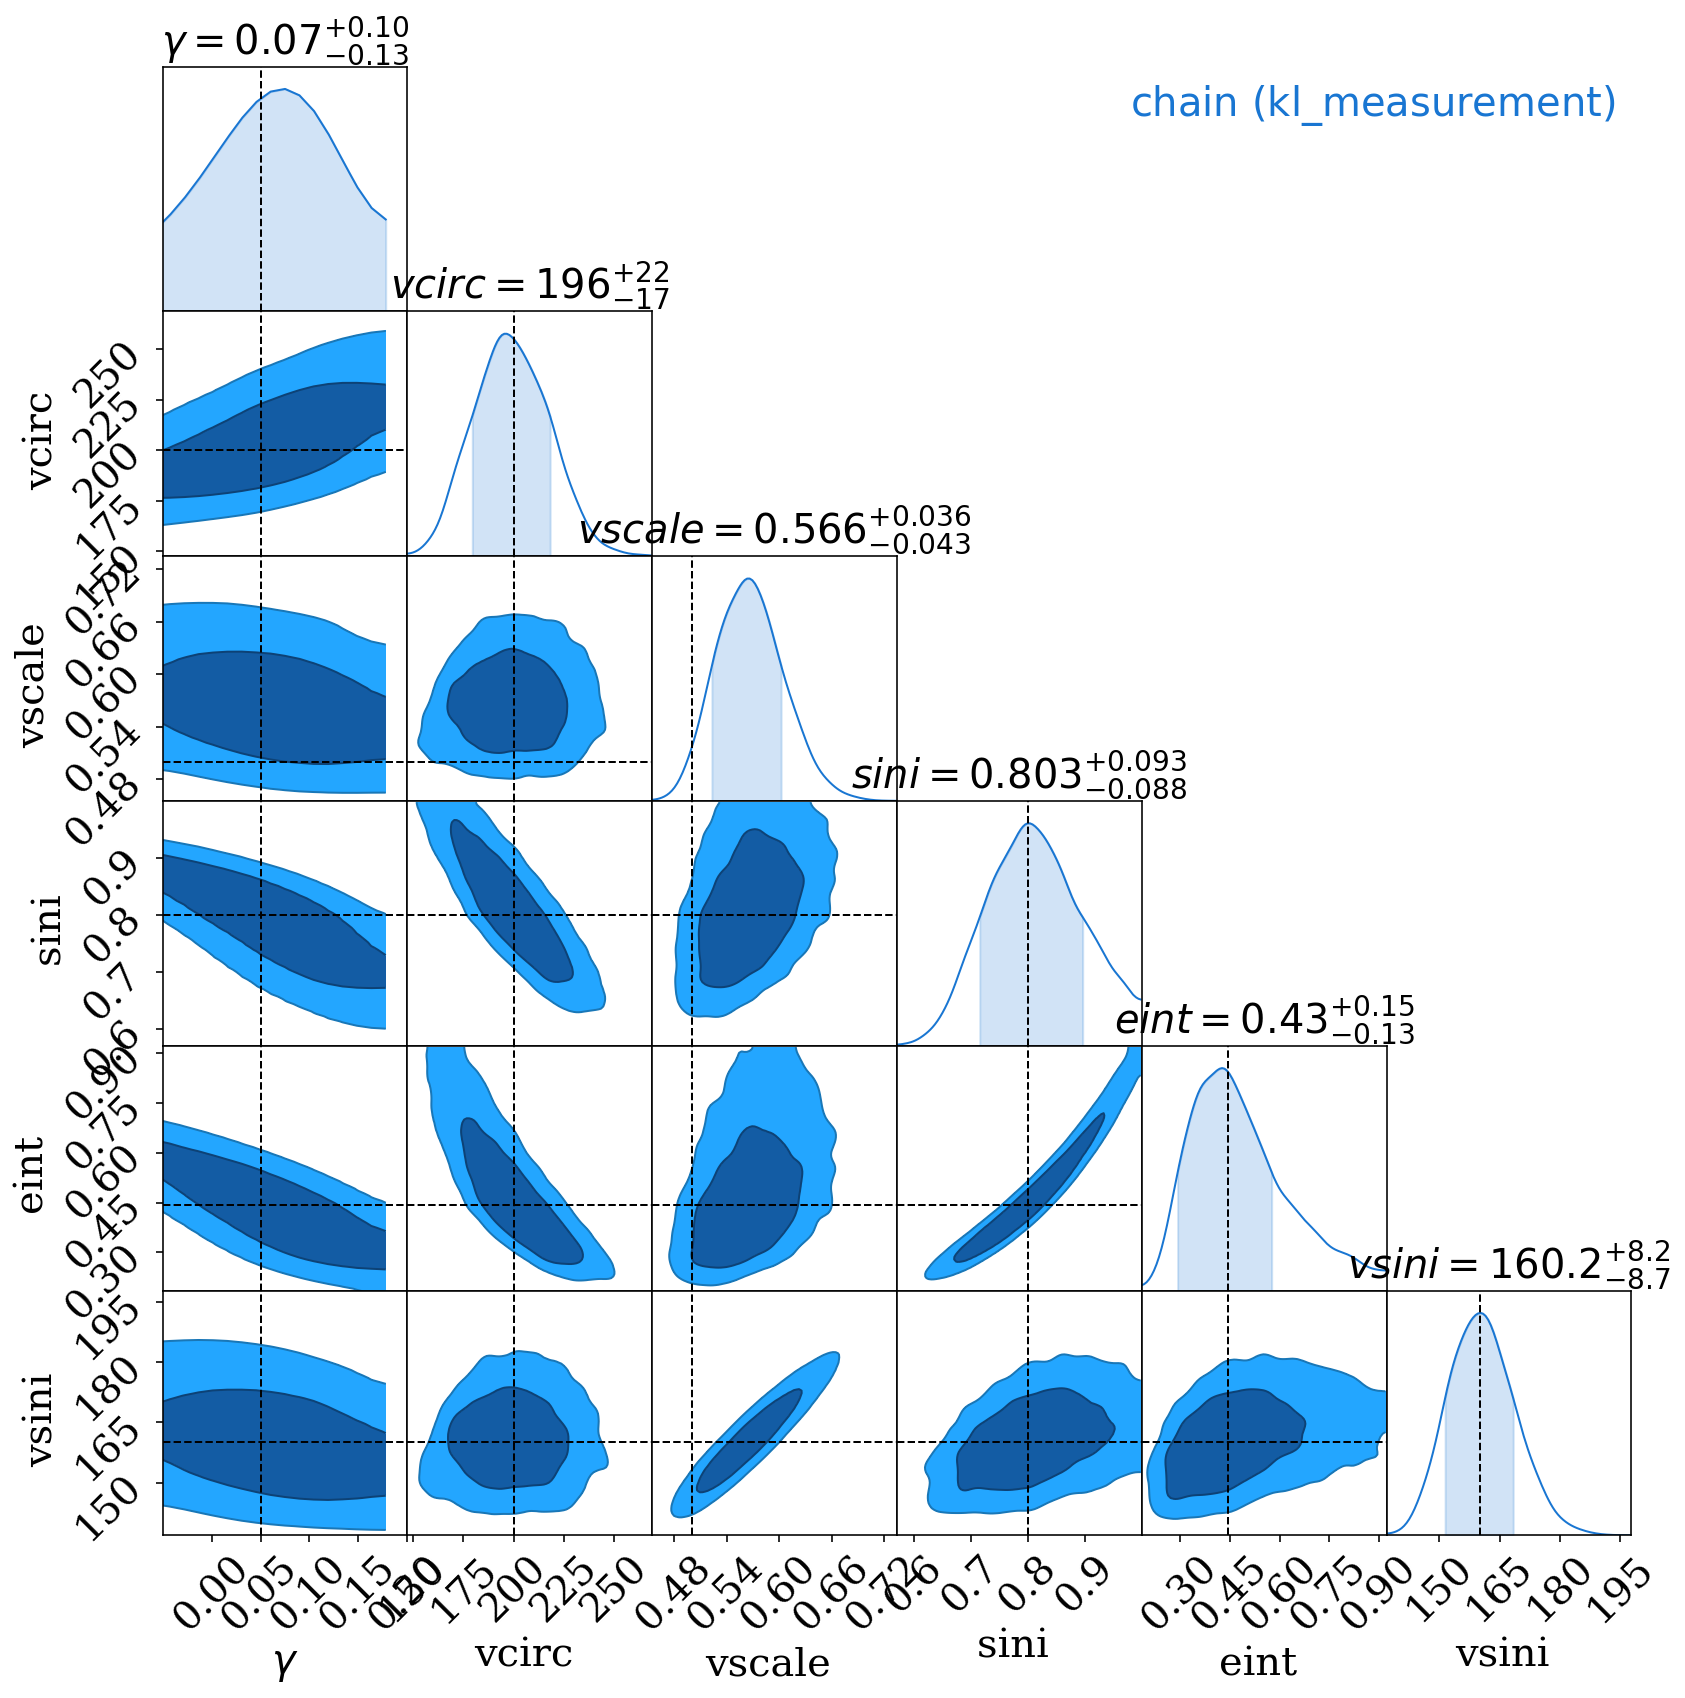

In [44]:
c = ChainConsumer()
c.add_chain(samples, parameters=['$\gamma$', 'vcirc', 'vscale', 'sini', 'eint', 'vsini'], color='b',name="$\mathrm{chain\ (kl\_measurement)}$")
c.configure(statistics="max", usetex=False, sigmas=np.array([0,1,2]), bins=0.5, sigma2d=False, summary=True,label_font_size=20,tick_font_size=20)

fig = c.plotter.plot(truth=[TF_pars['g1']]+list([true_pars['vcirc'], true_pars['vscale'], true_pars['sini'], e_int_true, true_pars['vcirc']*true_pars['sini']])
                    ,extents=[(-.05, .2)],legend=True)# filename='shear_constraints_400.pdf')

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

# End

In [32]:
for key in chisq_parameters.keys():
    if key in TF_pars.keys():
        if chisq_parameters[key] != TF_pars[key]:
            print(key)

vcirc
vscale
sini
half_light_radius


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
mask = np.ones_like(data['spectra'][0])
mask[122:135,50:100] = 0
plt.imshow(mask*data['spectra'][0])

In [ ]:
chisq_parameters['sini'] = 0.268
# chisq_parameters['vscale'] = 0.01
fit_spec = chisq.model_2d_spectrum(chisq_parameters, meta_parameters)
plt.imshow(mask*fit_spec)

In [ ]:
x_range = meta_parameters['pixScale'] * meta_parameters['image_size']
x_range